In [1]:
!pip install geopandas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
data.head(30)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Telangana,Adilabad,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,Andhra Pradesh,Anantapur,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,Andhra Pradesh,Chittoor,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,Andhra Pradesh,Kadapa(YSR),2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,Andhra Pradesh,East Godavari,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
5,Andhra Pradesh,NaN,2001,3,1,0,0,0,0,0,...,0,1,0,1,0,0,0,4,104,287
6,Andhra Pradesh,Guntur,2001,182,88,2,54,0,54,82,...,43,1792,7,139,129,378,0,369,2426,7848
7,Telangana,Hydrabad,2001,111,113,7,37,0,37,80,...,0,3137,24,118,27,746,0,409,1512,11831
8,Telangana,Karimnagar,2001,162,85,6,56,0,56,67,...,33,1392,62,414,81,224,0,322,1726,5811
9,Telangana,Khammam,2001,93,60,1,47,0,47,41,...,73,1026,17,180,336,172,0,209,1450,4582


In [3]:

r = pd.DataFrame(data.groupby(["STATE/UT","DISTRICT"])["TOTAL IPC CRIMES"].sum().reset_index())
r.columns = ['statename','distname', "CASES REPORTED"]
r.head()

,statename,distname,CASES REPORTED
0,Andaman & Nicobar Islands,Nicobars,1066
1,Andaman & Nicobar Islands,North & Middle Andaman,7492
2,Andaman & Nicobar Islands,South Andaman,544
3,Andhra Pradesh,Anantapur,59927
4,Andhra Pradesh,Chittoor,75471


In [4]:
%matplotlib inline 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
f = ("output.shp")
map_df = gpd.read_file(f)
map_df.head()

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry
0,1,05,Uttarakhand,STATE,066,Nainital,4251.0,954605.0,191383.0,493666.0,460939.0,5.322546e+09,506182.695952,"POLYGON ((79.52659 29.05543, 79.52550 29.05545..."
1,2,05,Uttarakhand,STATE,060,Dehradun,3088.0,1696694.0,347001.0,892199.0,804495.0,4.177236e+09,578188.681639,"POLYGON ((77.87557 30.26052, 77.87467 30.26087..."
2,3,05,Uttarakhand,STATE,064,Almora,3144.0,622506.0,140577.0,291081.0,331425.0,4.140751e+09,463454.225766,"POLYGON ((79.28494 29.92735, 79.28495 29.92723..."
3,4,05,Uttarakhand,STATE,065,Champawat,1766.0,259648.0,53953.0,131125.0,128523.0,2.294297e+09,314508.010612,"POLYGON ((80.12479 29.01308, 80.12481 29.01306..."
4,5,05,Uttarakhand,STATE,056,Uttarkashi,8016.0,330086.0,67602.0,168597.0,161489.0,1.085166e+10,786425.588972,"POLYGON ((78.92267 31.25333, 78.93106 31.26840..."


In [6]:
t1 = r.set_index(['statename','distname'])
t1.head()

CASES REPORTED
statename                 distname                               
Andaman & Nicobar Islands Nicobars                           1066
                          North  & Middle Andaman            7492
                          South Andaman                       544
Andhra Pradesh            Anantapur                         59927
                          Chittoor                          75471

In [7]:

together = map_df.set_index(['statename','distname']).join(t1)
together.head()

objectid statecode state_ut distcode  distarea  \
statename   distname                                                     
Uttarakhand Nainital           1        05    STATE      066    4251.0   
            Dehradun           2        05    STATE      060    3088.0   
            Almora             3        05    STATE      064    3144.0   
            Champawat          4        05    STATE      065    1766.0   
            Uttarkashi         5        05    STATE      056    8016.0   

                        totalpopul   totalhh  totpopmale  totpopfema  \
statename   distname                                                   
Uttarakhand Nainital      954605.0  191383.0    493666.0    460939.0   
            Dehradun     1696694.0  347001.0    892199.0    804495.0   
            Almora        622506.0  140577.0    291081.0    331425.0   
            Champawat     259648.0   53953.0    131125.0    128523.0   
            Uttarkashi    330086.0   67602.0    168597.0    161489.0   

                          st_areasha     st_lengths  \
statename   distname                                  
Uttarakhand Nainital    5.322546e+09  506182.695952   
            Dehradun    4.177236e+09  578188.681639   
            Almora      4.140751e+09  463454.225766   
            Champawat   2.294297e+09  314508.010612   
            Uttarkashi  1.085166e+10  786425.588972   

                                                                 geometry  \
statename   distname                                                        
Uttarakhand Nainital    POLYGON ((79.52659 29.05543, 79.52550 29.05545...   
            Dehradun    POLYGON ((77.87557 30.26052, 77.87467 30.26087...   
            Almora      POLYGON ((79.28494 29.92735, 79.28495 29.92723...   
            Champawat   POLYGON ((80.12479 29.01308, 80.12481 29.01306...   
            Uttarkashi  POLYGON ((78.92267 31.25333, 78.93106 31.26840...   

                        CASES REPORTED  
statename   distname                    
Uttarakhand Nainital           10211.0  
            Dehradun           24859.0  
            Almora              2784.0  
            Champawat           1203.0  
            Uttarkashi          2106.0

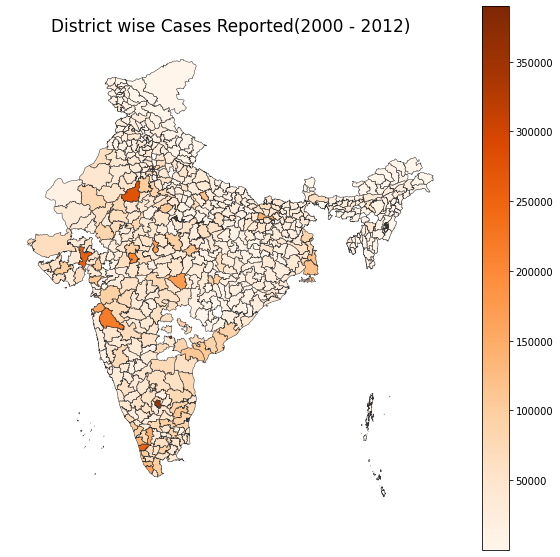

In [8]:
fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("District wise cases Reported (2000 - 2012)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="CASES REPORTED", cmap="Oranges", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("District wise Cases Reported(2000 - 2012)", size=17);


In [9]:

total_cases_sorted = r.sort_values("CASES REPORTED", ascending=False)[:10]

In [10]:
fig = px.bar(data_frame=total_cases_sorted, x="CASES REPORTED", y="distname", orientation='h', color_discrete_sequence=["red"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(title="Top 10 districts with highest number of Case reported over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()

In [11]:
m = pd.DataFrame(r.groupby(["statename"])["CASES REPORTED"].sum().reset_index())
m.head()

,statename,CASES REPORTED
0,Andaman & Nicobar Islands,9102
1,Andhra Pradesh,982181
2,Arunachal Pradesh,27354
3,Assam,512958
4,Bihar,1185240


In [12]:
f = ("Indian_States.shp")
map_df = gpd.read_file(f)
map_df.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [13]:
m.replace(to_replace='Andaman & Nicobar Islands',value='Andaman & Nicobar Island',inplace=True)
m.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
m.replace(to_replace='Chhatisgarh',value='Chhattisgarh',inplace=True)
m.replace(to_replace='Dadra & Nagar Haveli',value='Dadara & Nagar Havelli',inplace=True)
m.replace(to_replace='Ladakh',value='',inplace=True)
m.replace(to_replace='Orissa',value='Odisha',inplace=True)
m.replace(to_replace='Pondicherry',value='Puducherry',inplace=True)


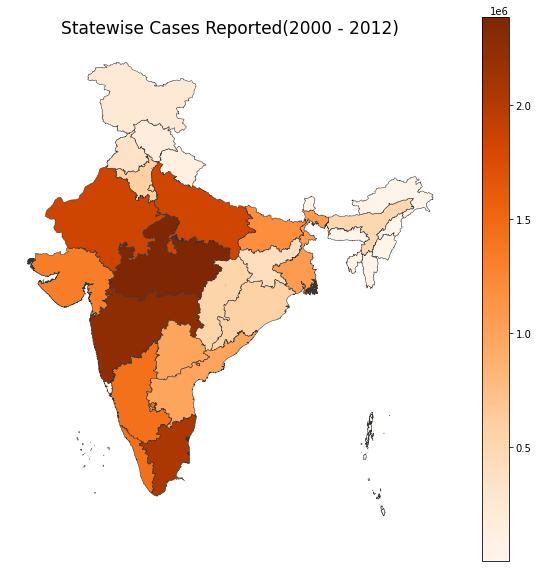

In [14]:
together = map_df.set_index('st_nm').join(m.set_index("statename"))
fig,ax=plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("State wise cases Reported (2000 - 2012)",
             fontdict={'fontsize': '15', 'fontweight': "3"})
fig = together.plot(column="CASES REPORTED", cmap="Oranges", linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
fig.set_title("Statewise Cases Reported(2000 - 2012)", size=17);


In [16]:
total_cases_sorted = m.sort_values("CASES REPORTED", ascending=False)[:10]
fig = px.bar(data_frame=total_cases_sorted, x="CASES REPORTED", y="statename", orientation='h', color_discrete_sequence=["red"]);
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(title="Top 10 states with highest number of Case reported over(2000-2012)")
fig.layout.template ="plotly_dark"
fig.show()